# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Insurance Claim Fraud Detection.csv',header=None)
df.head()

0   1       2           3   4         5     6        7        8       9   \
0  328  48  521585  17-10-2014  OH   250/500  1000  1406.91        0  466132   
1  228  42  342868  27-06-2006  IN   250/500  2000  1197.22  5000000  468176   
2  134  29  687698  06-09-2000  OH   100/300  2000  1413.14  5000000  430632   
3  256  41  227811  25-05-1990  IL   250/500  2000  1415.74  6000000  608117   
4  228  44  367455  06-06-2014  IL  500/1000  1000  1583.91  6000000  610706   

   ... 29   30     31    32     33     34         35     36    37 38  
0  ...  2  YES  71610  6510  13020  52080       Saab    92x  2004  Y  
1  ...  0    ?   5070   780    780   3510   Mercedes   E400  2007  Y  
2  ...  3   NO  34650  7700   3850  23100      Dodge    RAM  2007  N  
3  ...  2   NO  63400  6340   6340  50720  Chevrolet  Tahoe  2014  Y  
4  ...  1   NO   6500  1300    650   4550     Accura    RSX  2009  N  

[5 rows x 39 columns]

# Adding Meaningful names to columns

In [3]:
df.columns=['months_as_customer','age','policy_number','policy_bind_date','policy_state','policy_csl','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','capital_gains','capital_loss','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','incident_hour_of_the_day','number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year','fraud_reported']
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [4]:
df=df.set_index('policy_number')
df.head()

months_as_customer  age policy_bind_date policy_state  \
policy_number                                                          
521585                        328   48       17-10-2014           OH   
342868                        228   42       27-06-2006           IN   
687698                        134   29       06-09-2000           OH   
227811                        256   41       25-05-1990           IL   
367455                        228   44       06-06-2014           IL   

              policy_csl  policy_deductable  policy_annual_premium  \
policy_number                                                        
521585           250/500               1000                1406.91   
342868           250/500               2000                1197.22   
687698           100/300               2000                1413.14   
227811           250/500               2000                1415.74   
367455          500/1000               1000                1583.91   

               umbrella_limit  insured_zip insured_sex  ... witnesses  \
policy_number                                           ...             
521585                      0       466132        MALE  ...         2   
342868                5000000       468176        MALE  ...         0   
687698                5000000       430632      FEMALE  ...         3   
227811                6000000       608117      FEMALE  ...         2   
367455                6000000       610706        MALE  ...         1   

              police_report_available total_claim_amount injury_claim  \
policy_number                                                           
521585                            YES              71610         6510   
342868                              ?               5070          780   
687698                             NO              34650         7700   
227811                             NO              63400         6340   
367455                             NO               6500         1300   

               property_claim  vehicle_claim  auto_make auto_model auto_year  \
policy_number                                                                  
521585                  13020          52080       Saab        92x      2004   
342868                    780           3510   Mercedes       E400      2007   
687698                   3850          23100      Dodge        RAM      2007   
227811                   6340          50720  Chevrolet      Tahoe      2014   
367455                    650           4550     Accura        RSX      2009   

              fraud_reported  
policy_number                 
521585                     Y  
342868                     Y  
687698                     N  
227811                     Y  
367455                     N  

[5 rows x 38 columns]

# Exploratory Data Analysis

In [5]:
df.replace('?',np.nan,inplace=True)

In [6]:
print('The Shape of the dataset is ',df.shape)

The Shape of the dataset is  (1000, 38)


In [7]:
print('The Columns of the dataset are ',df.columns)

The Columns of the dataset are  Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')


In [8]:
print('The number of duplicated rows are ',df.duplicated().sum())

The number of duplicated rows are  0


In [9]:
df.isna().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital_gains                    0
capital_loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses           

In [10]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521585 to 556080
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_rel

In [12]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521585 to 556080
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_csl                   1000 non-null   object        
 5   policy_deductable            1000 non-null   int64         
 6   policy_annual_premium        1000 non-null   float64       
 7   umbrella_limit               1000 non-null   int64         
 8   insured_zip                  1000 non-null   int64         
 9   insured_sex                  1000 non-null   object        
 10  insured_education_level      1000 non-null   object        
 11  insured_occupation           1000 no

In [14]:
df.nunique().to_frame('Unique Values')

Unique Values
months_as_customer                     391
age                                     46
policy_bind_date                       951
policy_state                             3
policy_csl                               3
policy_deductable                        3
policy_annual_premium                  991
umbrella_limit                          11
insured_zip                            995
insured_sex                              2
insured_education_level                  7
insured_occupation                      14
insured_hobbies                         20
insured_relationship                     6
capital_gains                          338
capital_loss                           354
incident_date                           60
incident_type                            4
collision_type                           3
incident_severity                        4
authorities_contacted                    5
incident_state                           7
incident_city                            7
incident_location                     1000
incident_hour_of_the_day                24
number_of_vehicles_involved              4
property_damage                          2
bodily_injuries                          3
witnesses                                4
police_report_available                  2
total_claim_amount                     763
injury_claim                           638
property_claim                         626
vehicle_claim                          726
auto_make                               14
auto_model                              39
auto_year                               21
fraud_reported                           2

In [15]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=['int64','float64']).columns
print('Categorical Columns are ')
print(cat_cols)
print('Numerical Columns are ')
print(num_cols)

Categorical Columns are 
Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')
Numerical Columns are 
Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital_gains', 'capital_loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')


# Exploring Unique values in each columns

In [16]:
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print('='*50)

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kaya

In [17]:
df.describe(include='all').T

count unique                      top freq  \
months_as_customer           1000.0    NaN                      NaN  NaN   
age                          1000.0    NaN                      NaN  NaN   
policy_bind_date               1000    951      2006-01-01 00:00:00    3   
policy_state                   1000      3                       OH  352   
policy_csl                     1000      3                  250/500  351   
policy_deductable            1000.0    NaN                      NaN  NaN   
policy_annual_premium        1000.0    NaN                      NaN  NaN   
umbrella_limit               1000.0    NaN                      NaN  NaN   
insured_zip                  1000.0    NaN                      NaN  NaN   
insured_sex                    1000      2                   FEMALE  537   
insured_education_level        1000      7                       JD  161   
insured_occupation             1000     14        machine-op-inspct   93   
insured_hobbies                1000     20                  reading   64   
insured_relationship           1000      6                own-child  183   
capital_gains                1000.0    NaN                      NaN  NaN   
capital_loss                 1000.0    NaN                      NaN  NaN   
incident_date                  1000     60      2015-02-02 00:00:00   28   
incident_type                  1000      4  Multi-vehicle Collision  419   
collision_type                 1000      3           Rear Collision  470   
incident_severity              1000      4             Minor Damage  354   
authorities_contacted          1000      5                   Police  292   
incident_state                 1000      7                       NY  262   
incident_city                  1000      7              Springfield  157   
incident_location              1000   1000           9935 4th Drive    1   
incident_hour_of_the_day     1000.0    NaN                      NaN  NaN   
number_of_vehicles_involved  1000.0    NaN                      NaN  NaN   
property_damage                1000      2                       NO  698   
bodily_injuries              1000.0    NaN                      NaN  NaN   
witnesses                    1000.0    NaN                      NaN  NaN   
police_report_available        1000      2                       NO  686   
total_claim_amount           1000.0    NaN                      NaN  NaN   
injury_claim                 1000.0    NaN                      NaN  NaN   
property_claim               1000.0    NaN                      NaN  NaN   
vehicle_claim                1000.0    NaN                      NaN  NaN   
auto_make                      1000     14                     Saab   80   
auto_model                     1000     39                      RAM   43   
auto_year                    1000.0    NaN                      NaN  NaN   
fraud_reported                 1000      2                        N  753   

                                 first       last        mean             std  \
months_as_customer                 NaT        NaT     203.954      115.113174   
age                                NaT        NaT      38.948        9.140287   
policy_bind_date            1990-01-02 2015-03-01         NaN             NaN   
policy_state                       NaT        NaT         NaN             NaN   
policy_csl                         NaT        NaT         NaN             NaN   
policy_deductable                  NaT        NaT      1136.0      611.864673   
policy_annual_premium              NaT        NaT  1256.40615      244.167395   
umbrella_limit                     NaT        NaT   1101000.0  2297406.598118   
insured_zip                        NaT        NaT  501214.488    71701.610941   
insured_sex                        NaT        NaT         NaN             NaN   
insured_education_level            NaT        NaT         NaN             NaN   
insured_occupation                 NaT        NaT         NaN             NaN   
insured_hobb

In [18]:
df.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital_gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital_loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

* Mean value is greater than median in months_as_customers, policy_deductable, umbrella_limit,insured_zip,capital_gains,capital_loss,number_of_vehicles_involved,injury claim,property_claim.
* Median values greater than mean in total_claim_amount,vehicle claim.
* So the skewness is present.
* months as customers,policy annual premium, capital_gains,total claim amount,injury claim,property claim,vehicle claim.
* So the outliers are present.

# Univariate Analysis

<AxesSubplot:xlabel='policy_state', ylabel='count'>

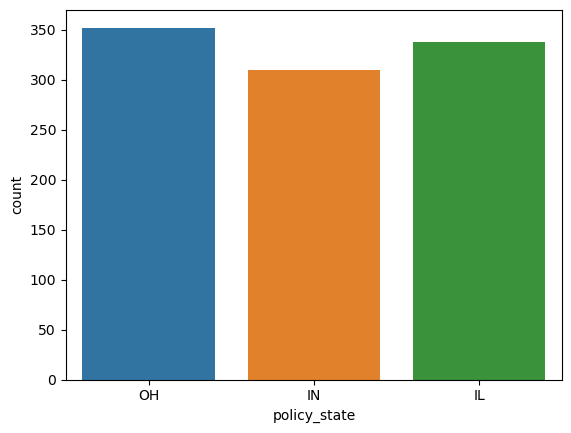

In [19]:
sns.countplot(df['policy_state'])

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

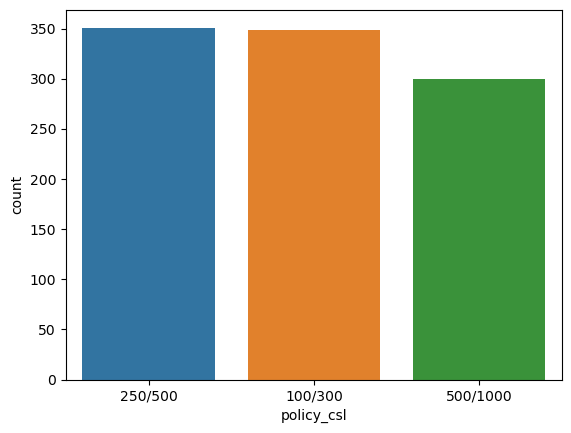

In [20]:
sns.countplot(df['policy_csl'])

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

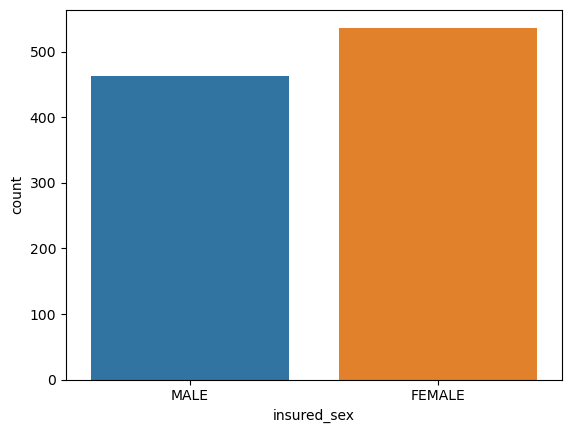

In [21]:
sns.countplot(df['insured_sex'])

<AxesSubplot:xlabel='count', ylabel='insured_education_level'>

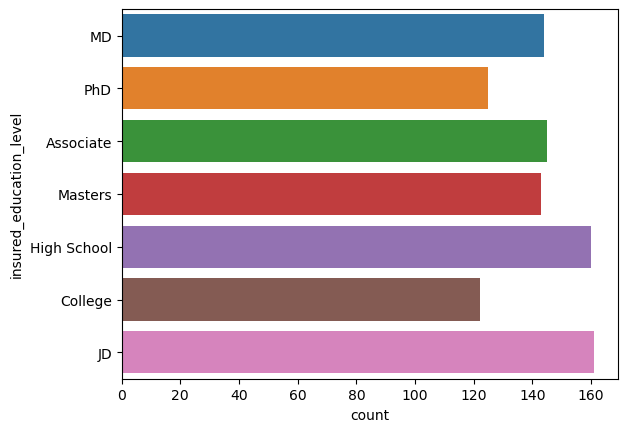

In [22]:
sns.countplot(y=df['insured_education_level'])

<AxesSubplot:xlabel='count', ylabel='insured_occupation'>

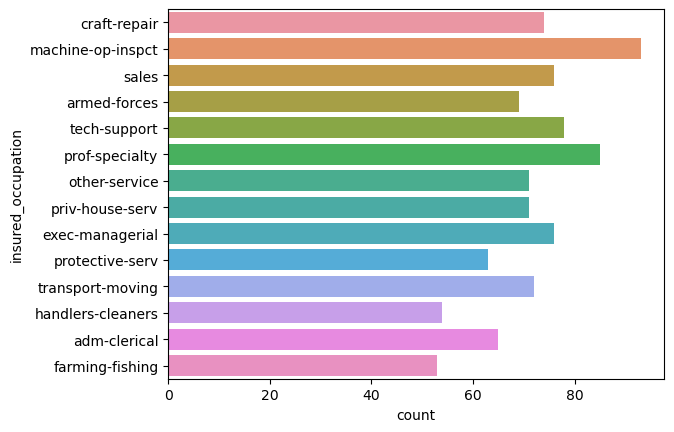

In [23]:
sns.countplot(y=df['insured_occupation'])

<AxesSubplot:xlabel='count', ylabel='insured_hobbies'>

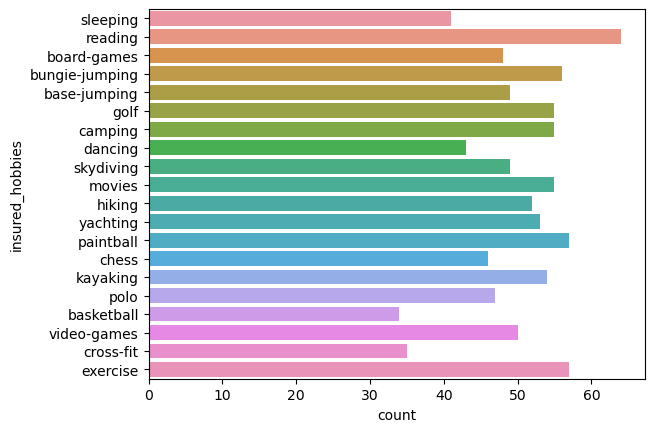

In [24]:
sns.countplot(y=df['insured_hobbies'])

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

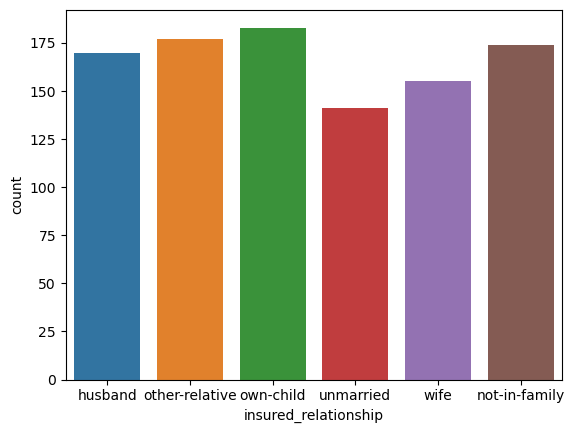

In [25]:
sns.countplot(df['insured_relationship'])

<AxesSubplot:xlabel='incident_type', ylabel='count'>

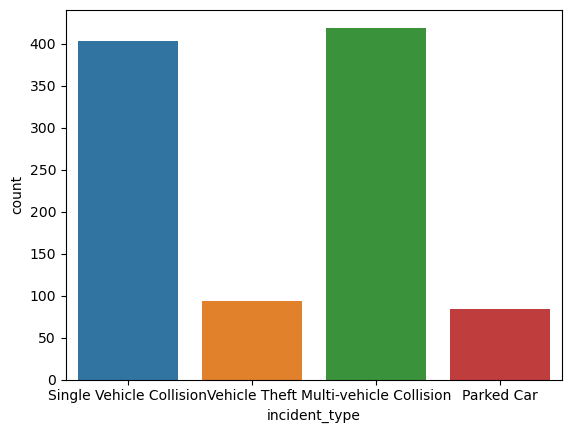

In [26]:
sns.countplot(df['incident_type'])

<AxesSubplot:xlabel='collision_type', ylabel='count'>

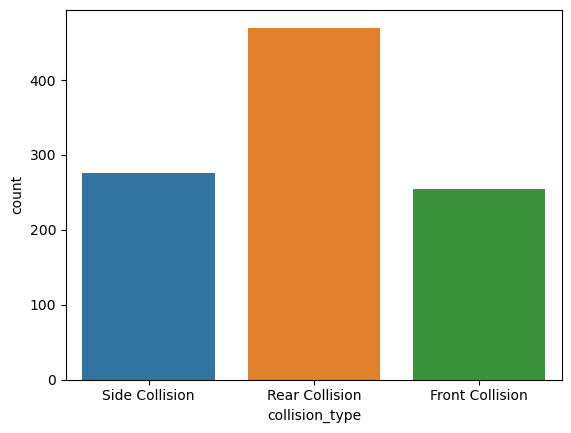

In [27]:
sns.countplot(df['collision_type'])

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

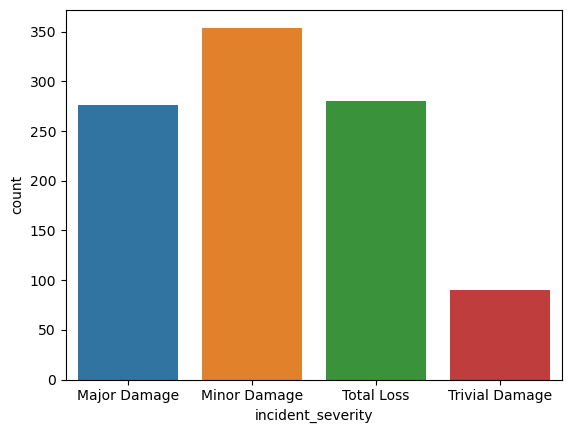

In [28]:
sns.countplot(df['incident_severity'])

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

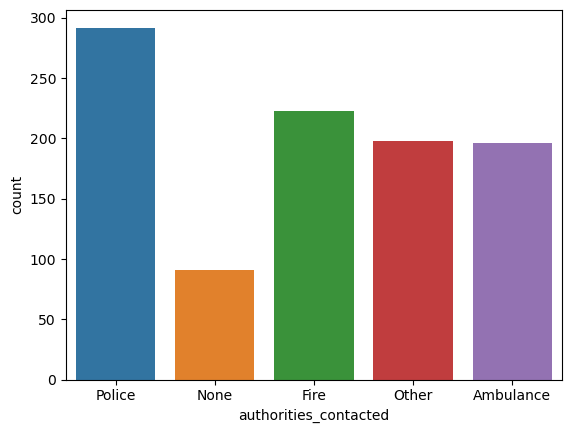

In [29]:
sns.countplot(df['authorities_contacted'])

<AxesSubplot:xlabel='count', ylabel='incident_state'>

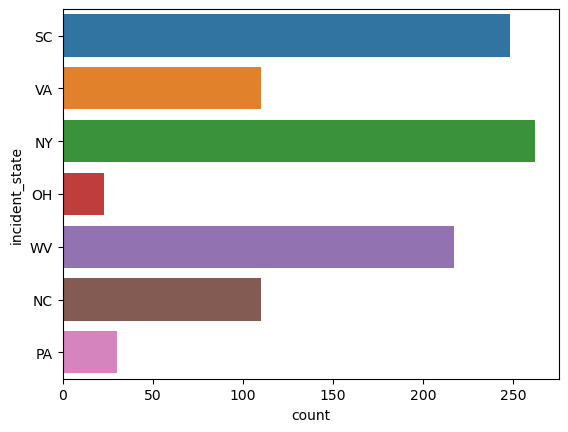

In [30]:
sns.countplot(y=df['incident_state'])

<AxesSubplot:xlabel='incident_city', ylabel='count'>

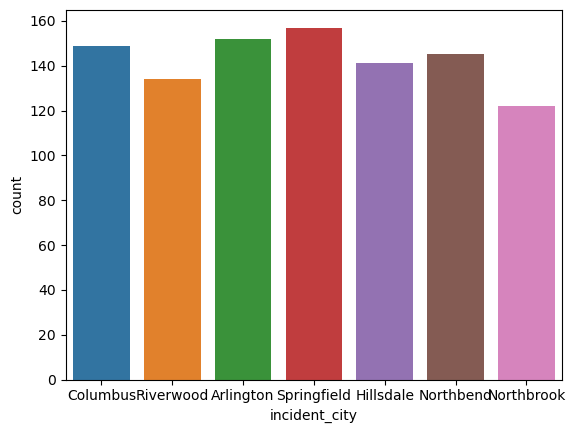

In [31]:
sns.countplot(df['incident_city'])

<AxesSubplot:xlabel='property_damage', ylabel='count'>

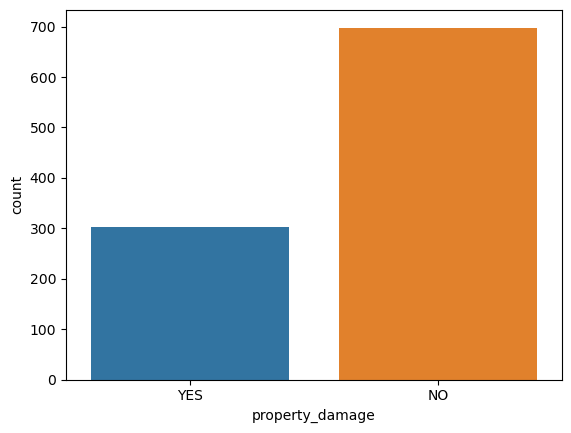

In [32]:
sns.countplot(df['property_damage'])

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

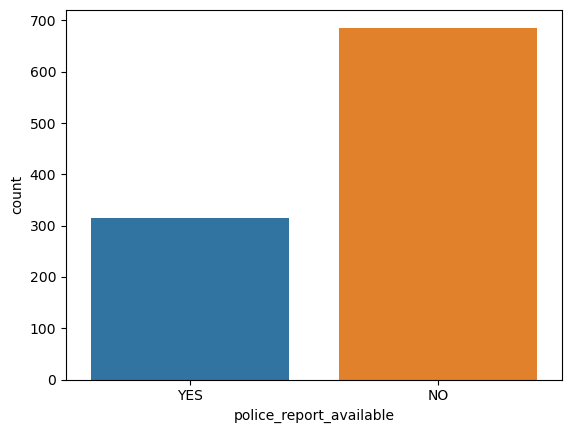

In [33]:
sns.countplot(df['police_report_available'])

<AxesSubplot:xlabel='count', ylabel='auto_make'>

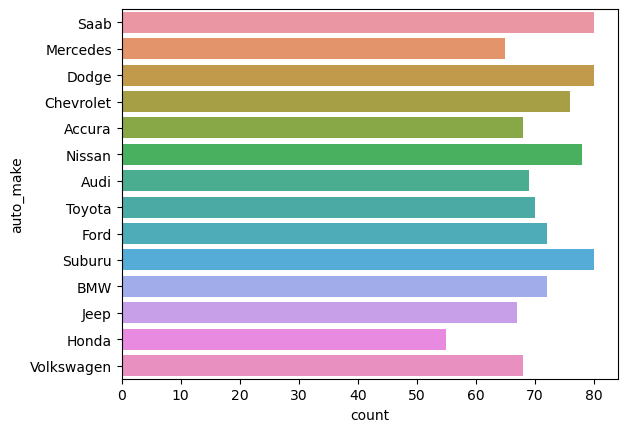

In [34]:
sns.countplot(y=df['auto_make'])

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

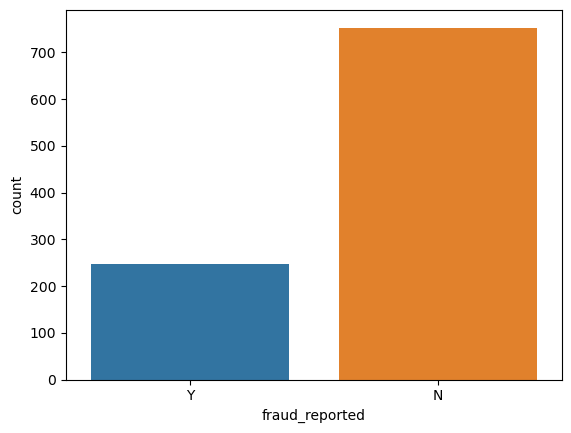

In [35]:
sns.countplot(df['fraud_reported'])

In [36]:
df.drop(columns = ['policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year'],axis = 1, inplace = True)

# Bi-Variate Analysis

<AxesSubplot:xlabel='age', ylabel='policy_deductable'>

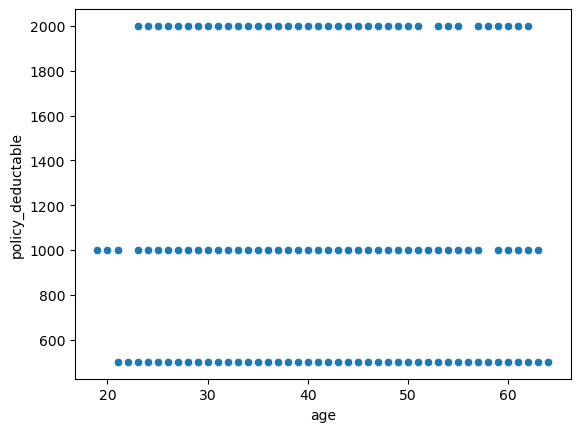

In [38]:
sns.scatterplot(x='age',y='policy_deductable',data=df)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='total_claim_amount'>

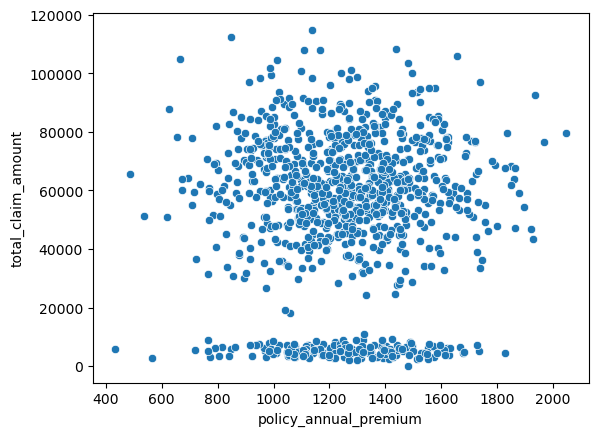

In [39]:
sns.scatterplot(x = 'policy_annual_premium',y = 'total_claim_amount', data = df)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='umbrella_limit'>

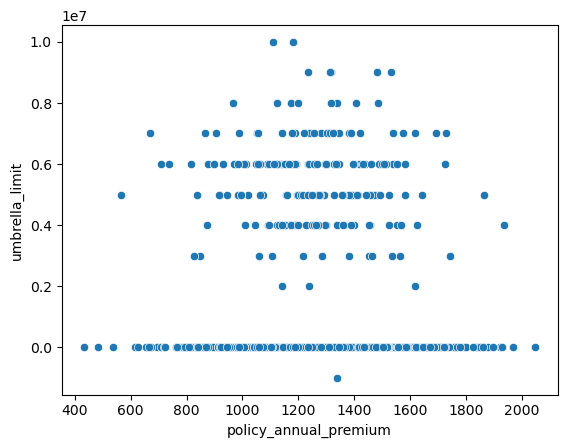

In [40]:
sns.scatterplot(x = 'policy_annual_premium',y = 'umbrella_limit', data = df)

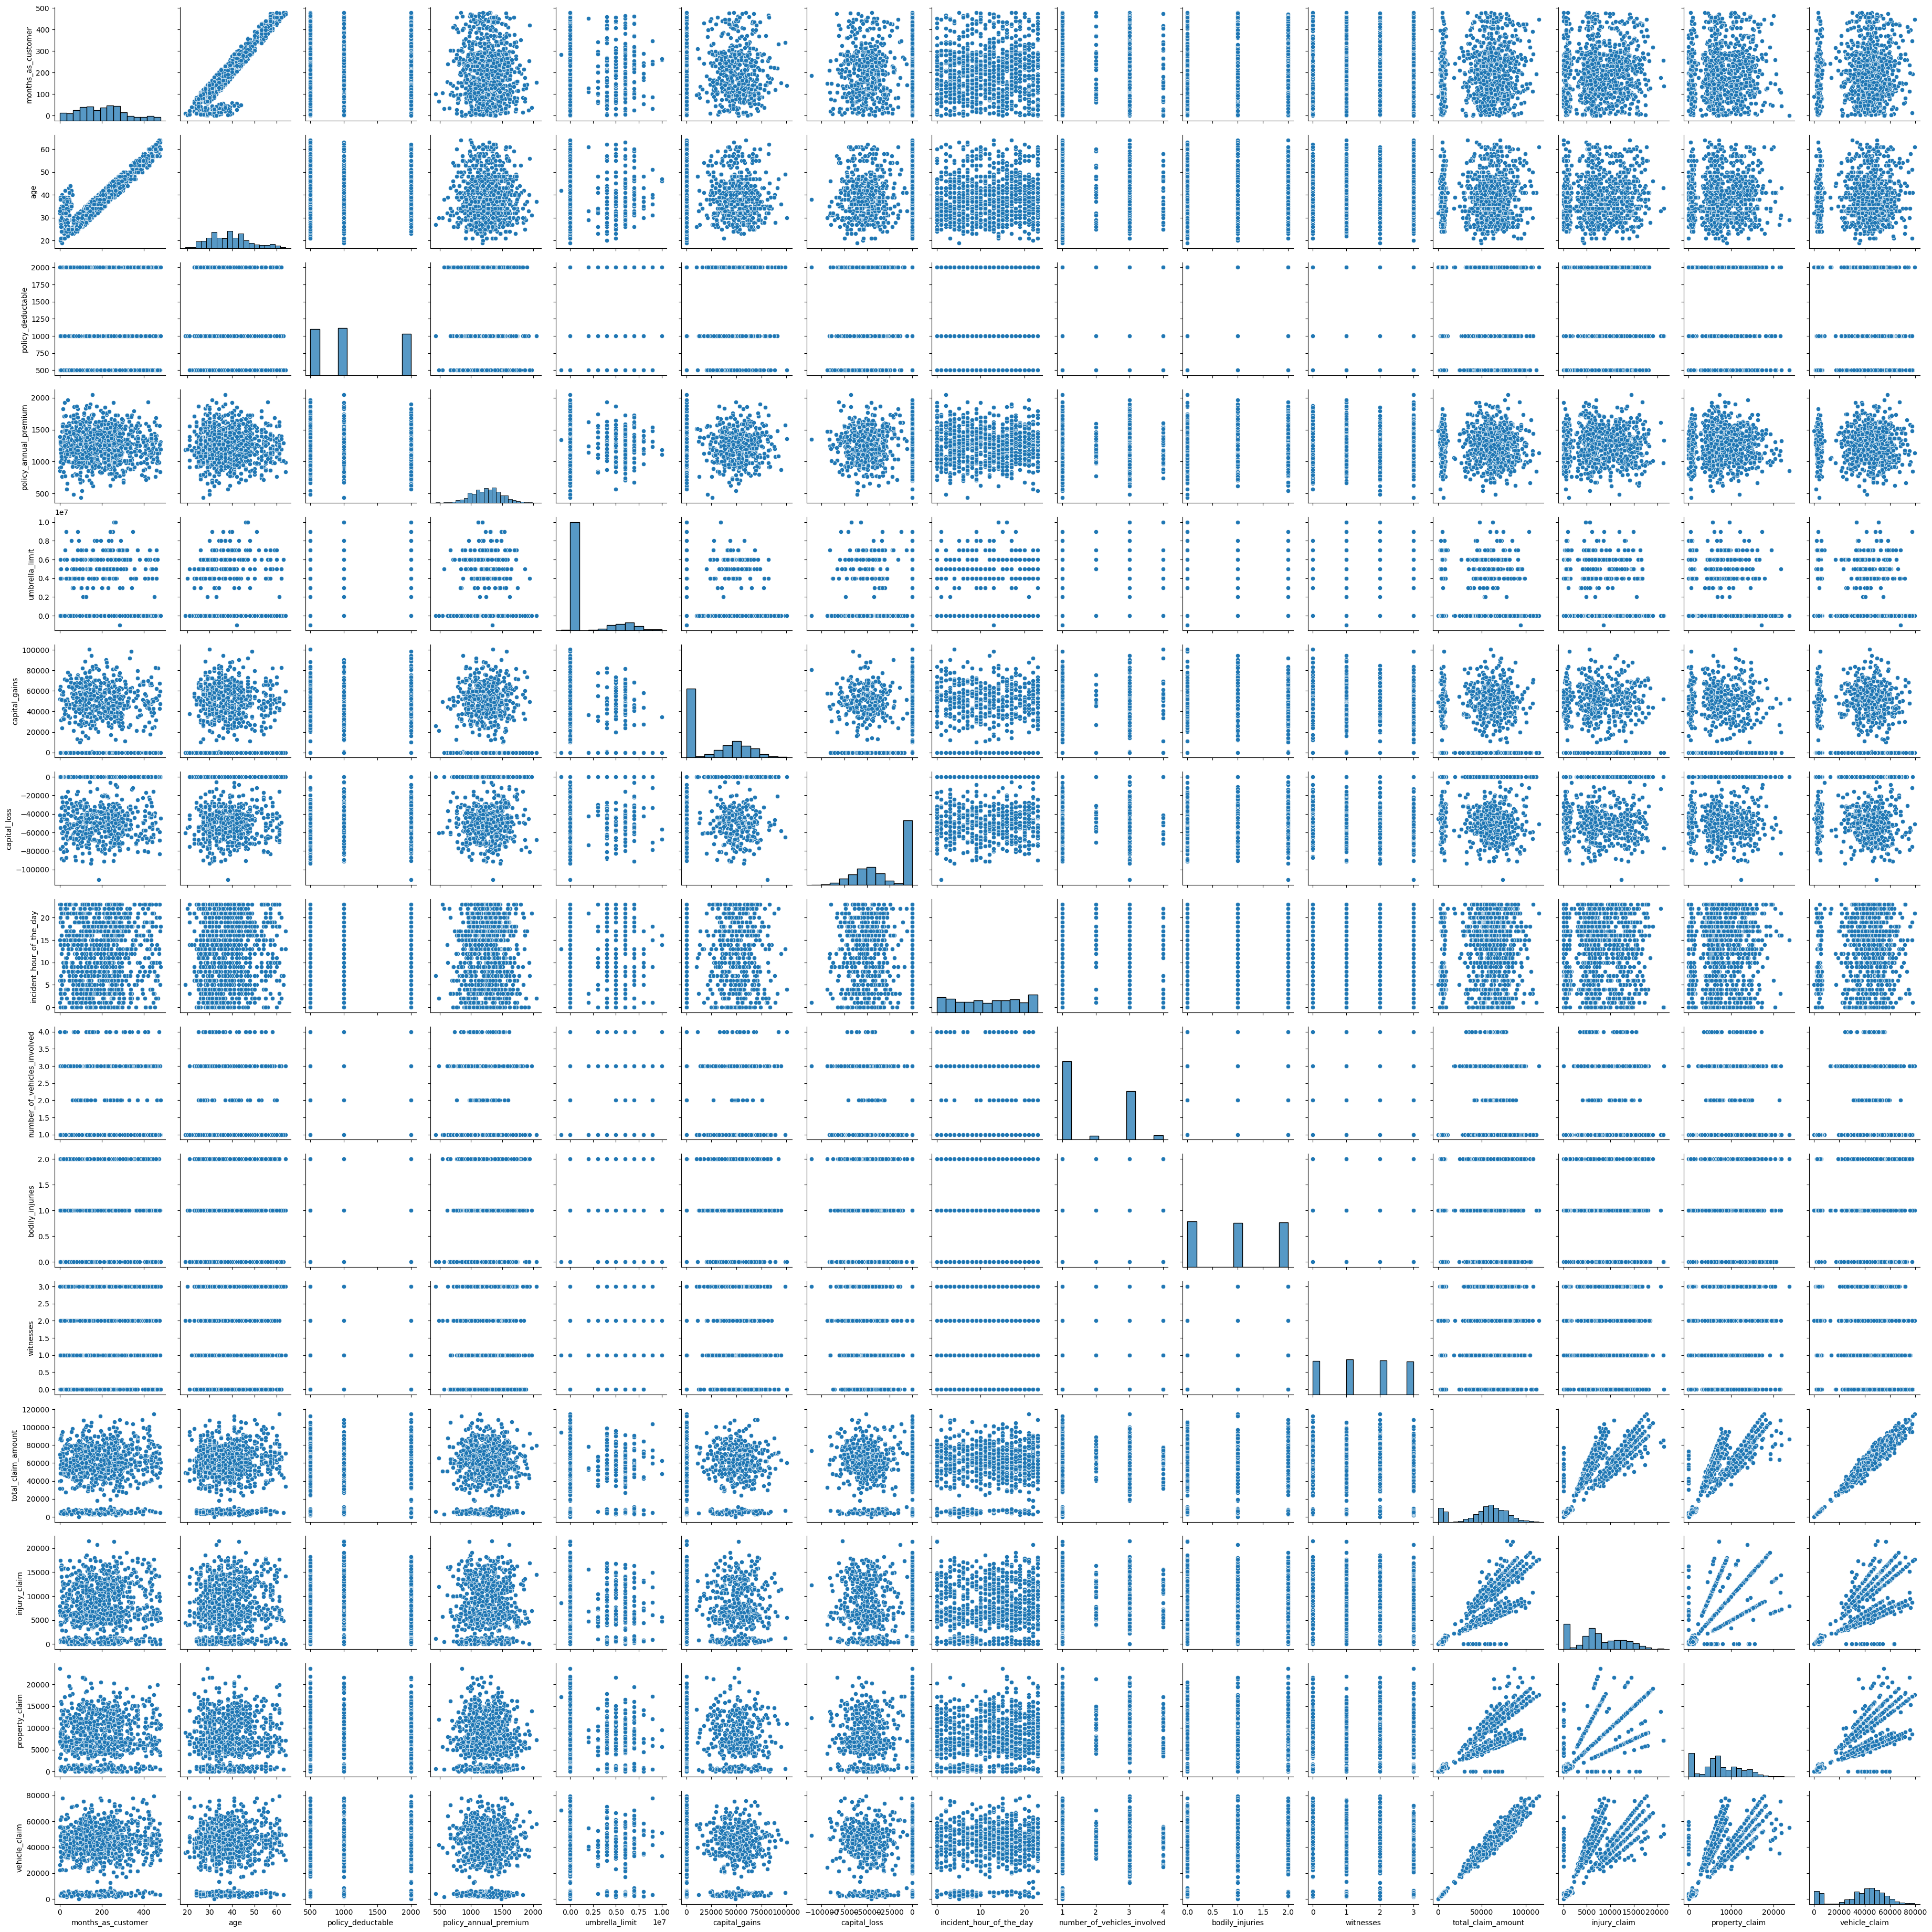

In [41]:
sns.pairplot(df)

# Encoding Techniques

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
gd = pd.get_dummies(df[['policy_csl','collision_type','incident_severity']])
df = pd.concat([df,gd],axis = 1)
df.drop(columns = ['policy_csl','collision_type','incident_severity'],axis = 1,inplace = True)
df.shape

(1000, 34)

In [44]:
lb = LabelEncoder()
df['insured_sex'] = lb.fit_transform(df['insured_sex'])
df['insured_education_level'] = lb.fit_transform(df['insured_education_level'])
df['insured_occupation'] = lb.fit_transform(df['insured_occupation'])
df['insured_relationship'] = lb.fit_transform(df['insured_relationship'])
df['authorities_contacted'] = lb.fit_transform(df['authorities_contacted'])
df['property_damage'] = lb.fit_transform(df['property_damage'])
df['police_report_available'] = lb.fit_transform(df['police_report_available'])
df['fraud_reported'] = lb.fit_transform(df['fraud_reported'])

In [45]:
df['incident_type'] = df['incident_type'].replace('Parked Car',0)
df['incident_type'] = df['incident_type'].replace('Single Vehicle Collision',1)
df['incident_type'] = df['incident_type'].replace('Vehicle Theft',2)
df['incident_type'] = df['incident_type'].replace('Multi-vehicle Collision',3)

# Detecting Outliers

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

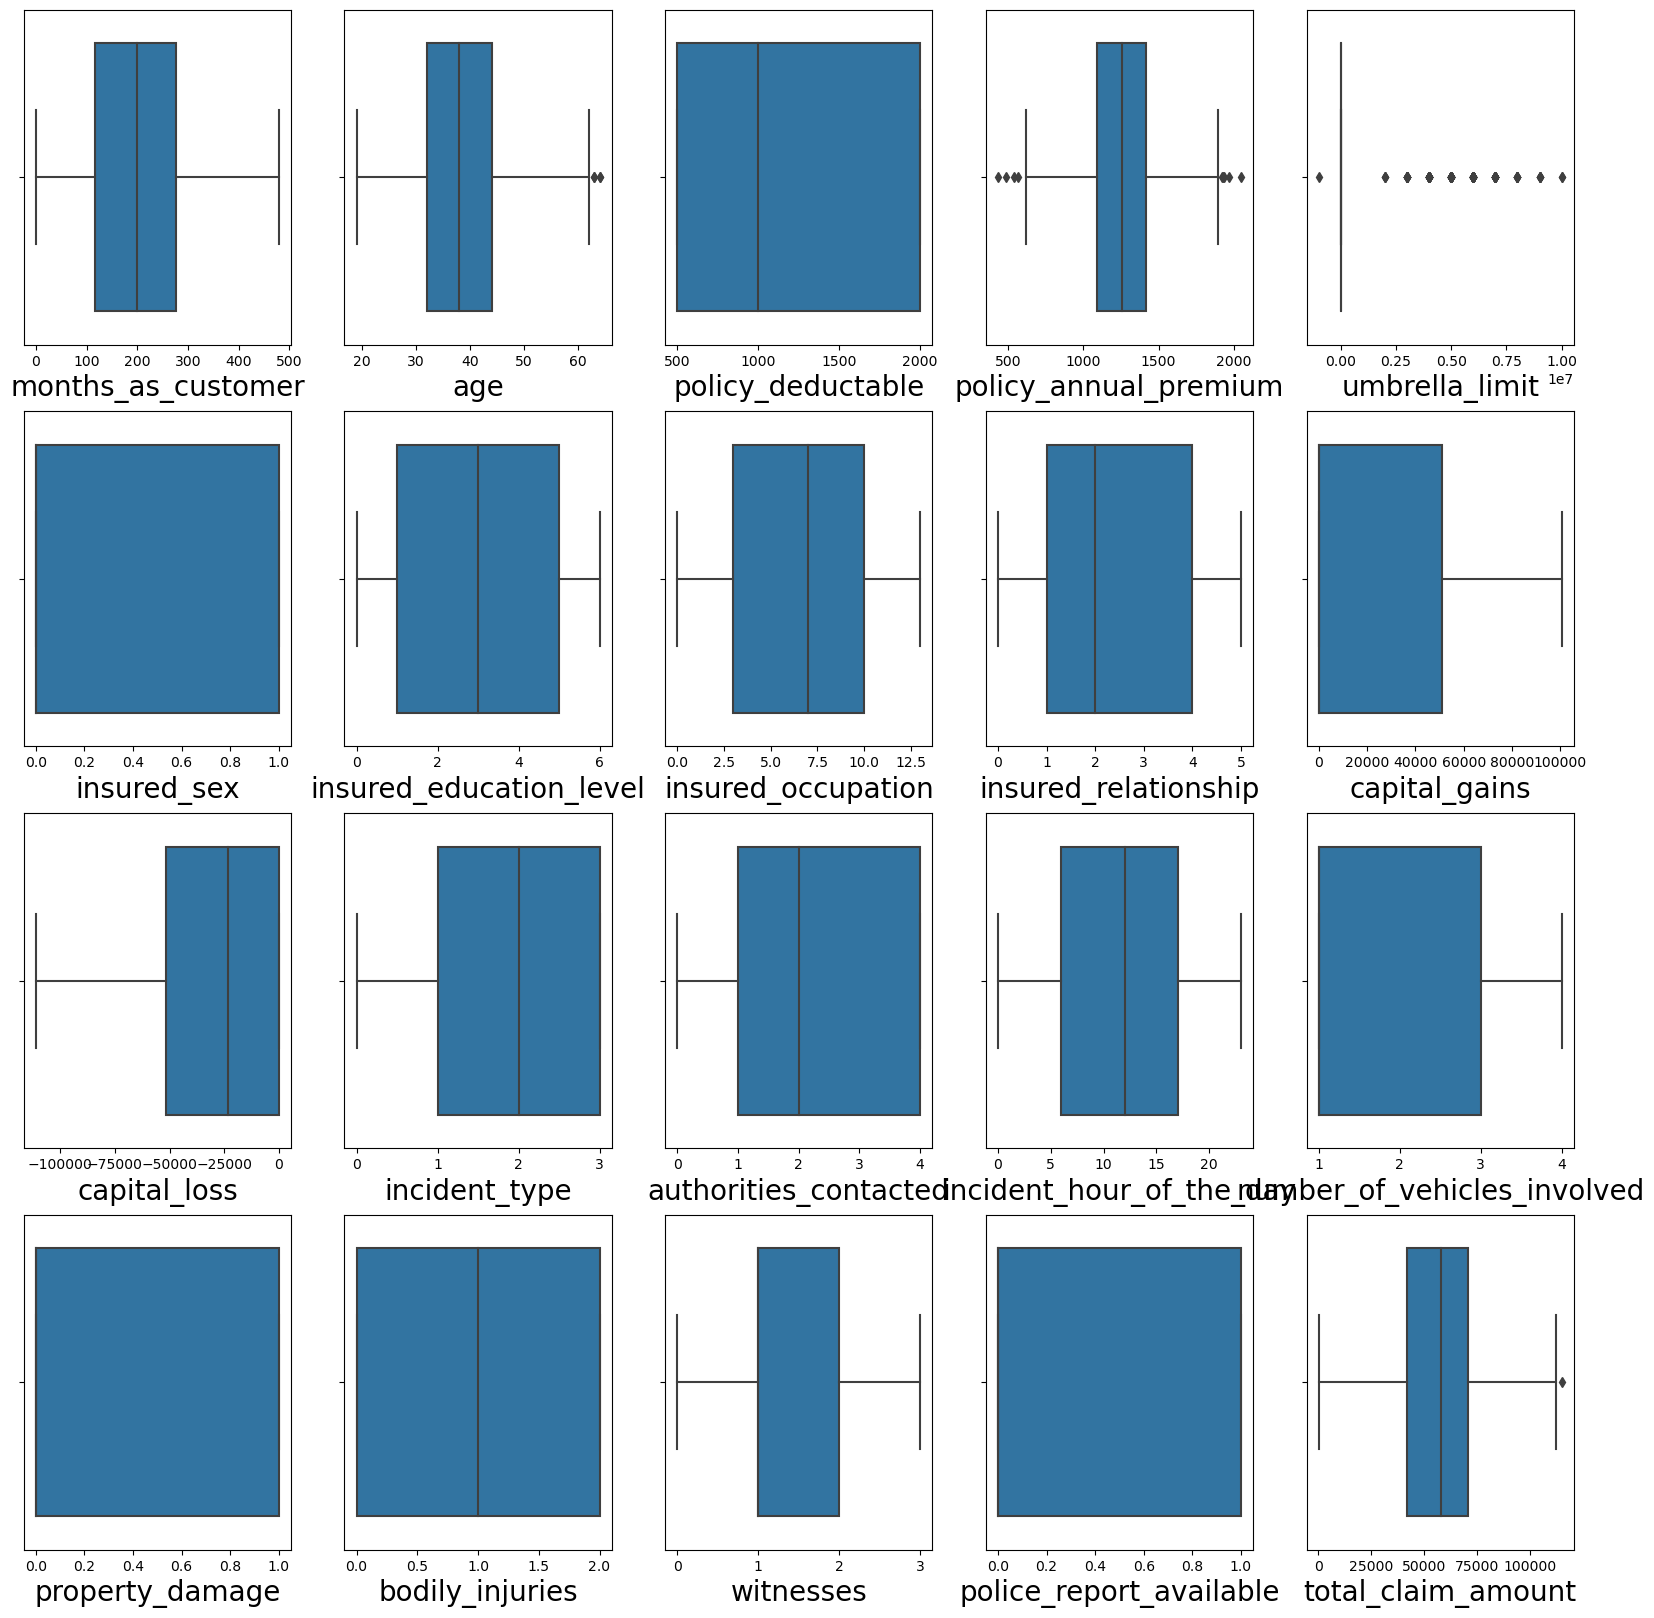

In [46]:
plt.figure(figsize=(20,20))
plot_number=1
for col in df:
    if plot_number<=20:
        ax=plt.subplot(4,5,plot_number)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plot_number+=1
    
plt.tight_layout

Outliers present in age, policy annual premium,umbrella limit,property_claim

# Removing outliers using Z-Score

In [48]:
from scipy.stats import zscore

In [50]:
z=np.abs(zscore(df))
z

months_as_customer       age  policy_deductable  \
policy_number                                                    
521585                   1.078140  0.990836           0.222383   
342868                   0.208995  0.334073           1.412784   
687698                   0.608002  1.088913           1.412784   
227811                   0.452355  0.224613           1.412784   
367455                   0.208995  0.552994           0.222383   
...                           ...       ...                ...   
941851                   1.746582  0.103769           0.222383   
186934                   0.704407  0.224613           0.222383   
918516                   0.642767  0.541611           1.039966   
533940                   2.208028  2.523284           1.412784   
556080                   2.190645  2.304363           0.222383   

               policy_annual_premium  umbrella_limit  insured_sex  \
policy_number                                                       
521585                      0.616705        0.479476     1.076953   
342868                      0.242521        1.697980     1.076953   
687698                      0.642233        1.697980     0.928546   
227811                      0.652886        2.133471     0.928546   
367455                      1.341980        2.133471     1.076953   
...                              ...             ...          ...   
941851                      0.222884        0.479476     0.928546   
186934                      0.739141        0.479476     0.928546   
918516                      0.520739        0.826998     0.928546   
533940                      0.411866        1.697980     1.076953   
556080                      2.008710        0.479476     0.928546   

               insured_education_level  insured_occupation  \
policy_number                                                
521585                        0.530931            1.158316   
342868                        0.530931            0.162558   
687698                        1.557877            1.082141   
227811                        1.557877            1.407256   
367455                        1.522961            1.082141   
...                                ...                 ...   
941851                        1.044404            1.158316   
186934                        1.557877            0.584261   
918516                        1.044404            1.407256   
533940                        1.522961            0.411497   
556080                        1.522961            1.082141   

               insured_relationship  capital_gains  ...  policy_csl_100/300  \
policy_number                                       ...                       
521585                     1.437957       1.011331  ...            0.732187   
342868                     0.247595       0.901927  ...            0.732187   
687698                     0.347586       0.358023  ...            1.365771   
227811                     0.942766       0.853388  ...            0.732187   
367455                     0.942766       1.467210  ...            0.732187   
...                             ...            ...  ...                 ...   
941851                     0.942766       0.901927  ...            0.732187   
186934                     1.537947       1.643100  ...            1.365771   
918516                     0.247595       0.358023  ...            0.732187   
533940                     1.537947       0.901927  ...            0.732187   
556080                     1.437957       0.901927  ...            0.732187   

               policy_csl_250/500  policy_csl_500/1000  \
policy_number                                            
521585                   1.359780             0.654654   
342868                   1.359780             0.654654   
687698                   0.735413             0.654654   
227811                   1.359780             0.654654   
367455                   0.735413             1.527525   
...              

In [51]:
np.where(z>3)

(array([ 31,  48,  48,  51,  81,  83,  88,  88,  92,  98,  99, 115, 119,
        141, 168, 174, 179, 196, 197, 200, 202, 209, 211, 217, 229, 242,
        244, 248, 252, 258, 260, 262, 265, 281, 287, 297, 300, 303, 314,
        332, 333, 362, 366, 398, 409, 411, 418, 430, 437, 438, 439, 452,
        458, 473, 496, 500, 503, 511, 519, 525, 527, 541, 553, 556, 584,
        586, 596, 597, 603, 622, 627, 635, 637, 648, 656, 657, 674, 675,
        677, 681, 682, 686, 695, 698, 700, 719, 721, 763, 775, 783, 790,
        799, 804, 807, 818, 820, 837, 840, 849, 875, 876, 892, 896, 916,
        922, 928, 961, 969, 975, 983], dtype=int64),
 array([ 4,  4, 33, 33, 33, 33,  4, 33, 33, 33, 33,  4,  4, 33, 33, 33, 33,
        33, 33, 33, 33, 33, 33, 33,  3, 33, 33,  3, 33, 33, 33,  4, 33, 33,
        33, 33, 33, 33,  4, 33, 33, 33, 33, 33, 33, 33, 33,  4, 33, 33, 33,
        33,  4, 33, 33, 21,  4, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
        33, 33, 33, 33, 33, 33, 33,  4, 33, 33, 33, 33, 33,

In [52]:
df=df[(z<3).all(axis=1)]
df

months_as_customer  age  policy_deductable  \
policy_number                                               
521585                        328   48               1000   
342868                        228   42               2000   
687698                        134   29               2000   
227811                        256   41               2000   
367455                        228   44               1000   
...                           ...  ...                ...   
941851                          3   38               1000   
186934                        285   41               1000   
918516                        130   34                500   
533940                        458   62               2000   
556080                        456   60               1000   

               policy_annual_premium  umbrella_limit  insured_sex  \
policy_number                                                       
521585                       1406.91               0            1   
342868                       1197.22         5000000            1   
687698                       1413.14         5000000            0   
227811                       1415.74         6000000            0   
367455                       1583.91         6000000            1   
...                              ...             ...          ...   
941851                       1310.80               0            0   
186934                       1436.79               0            0   
918516                       1383.49         3000000            0   
533940                       1356.92         5000000            1   
556080                        766.19               0            0   

               insured_education_level  insured_occupation  \
policy_number                                                
521585                               4                   2   
342868                               4                   6   
687698                               6                  11   
227811                               6                   1   
367455                               0                  11   
...                                ...                 ...   
941851                               5                   2   
186934                               6                   9   
918516                               5                   1   
533940                               0                   5   
556080                               0                  11   

               insured_relationship  capital_gains  ...  policy_csl_100/300  \
policy_number                                       ...                       
521585                            0          53300  ...                   0   
342868                            2              0  ...                   0   
687698                            3          35100  ...                   1   
227811                            4          48900  ...                   0   
367455                            4          66000  ...                   0   
...                             ...            ...  ...                 ...   
941851                            4              0  ...                   0   
186934                            5          70900  ...                   1   
918516                            2          35100  ...                   0   
533940                            5              0  ...                   0   
556080                            0              0  ...                   0   

               policy_csl_250/500  policy_csl_500/1000  \
policy_number                                            
521585                          1                    0   
342868                          1                    0   
687698                          0                    0   
227811                          1                    0   
367455                          0                    1   
...                           ...                  ...   
941851                  

# Detecting Skewness

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

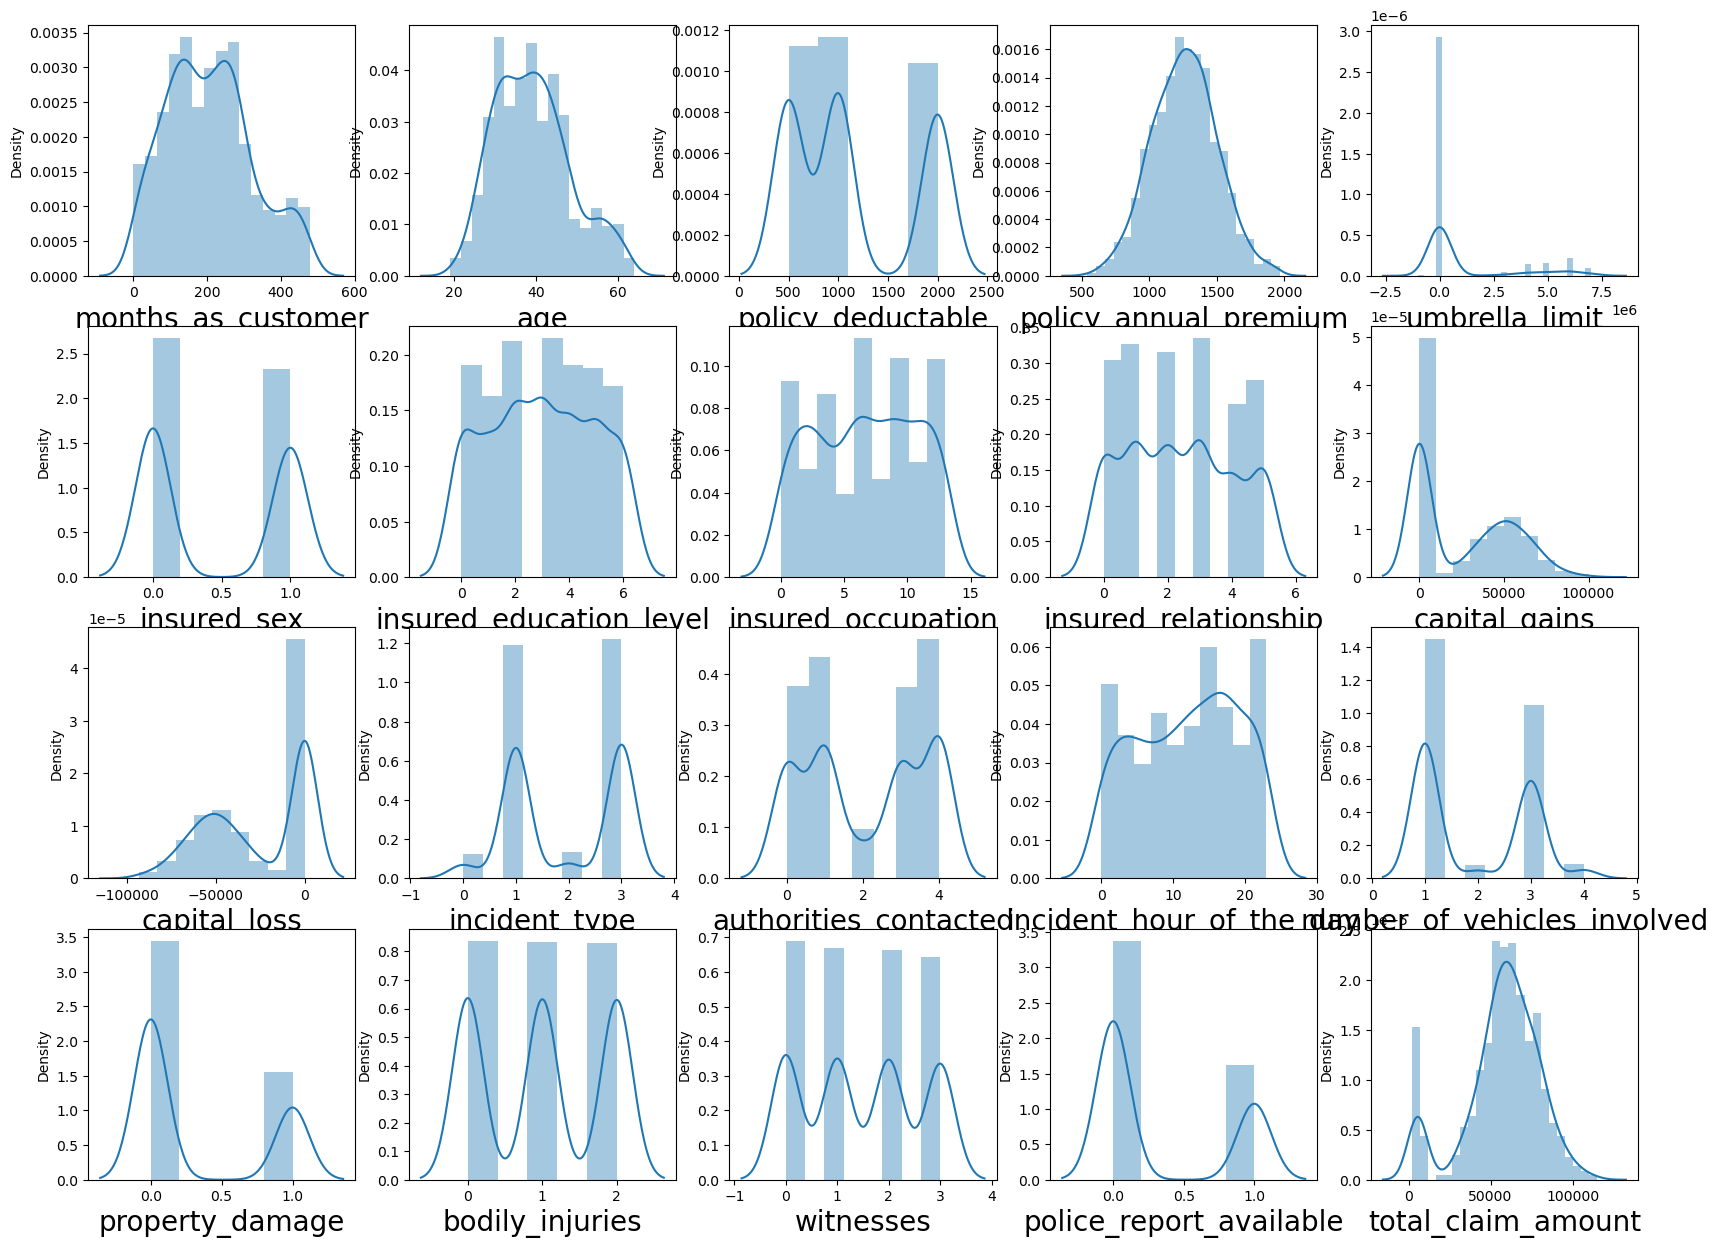

In [55]:
plt.figure(figsize=(20,15))
plot_number=1
for col in df:
    if plot_number<=20:
        ax=plt.subplot(4,5,plot_number)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plot_number+=1
plt.tight_layout

In [56]:
df.skew()

months_as_customer                  0.377493
age                                 0.473101
policy_deductable                   0.459113
policy_annual_premium               0.050332
umbrella_limit                      1.808527
insured_sex                         0.139585
insured_education_level            -0.001805
insured_occupation                 -0.059575
insured_relationship                0.101482
capital_gains                       0.444409
capital_loss                       -0.355794
incident_type                      -0.083987
authorities_contacted              -0.034388
incident_hour_of_the_day           -0.150435
number_of_vehicles_involved         0.351031
property_damage                     0.820296
bodily_injuries                     0.006191
witnesses                           0.031738
police_report_available             0.753448
total_claim_amount                 -0.739824
injury_claim                        0.227697
property_claim                      0.355494
vehicle_cl

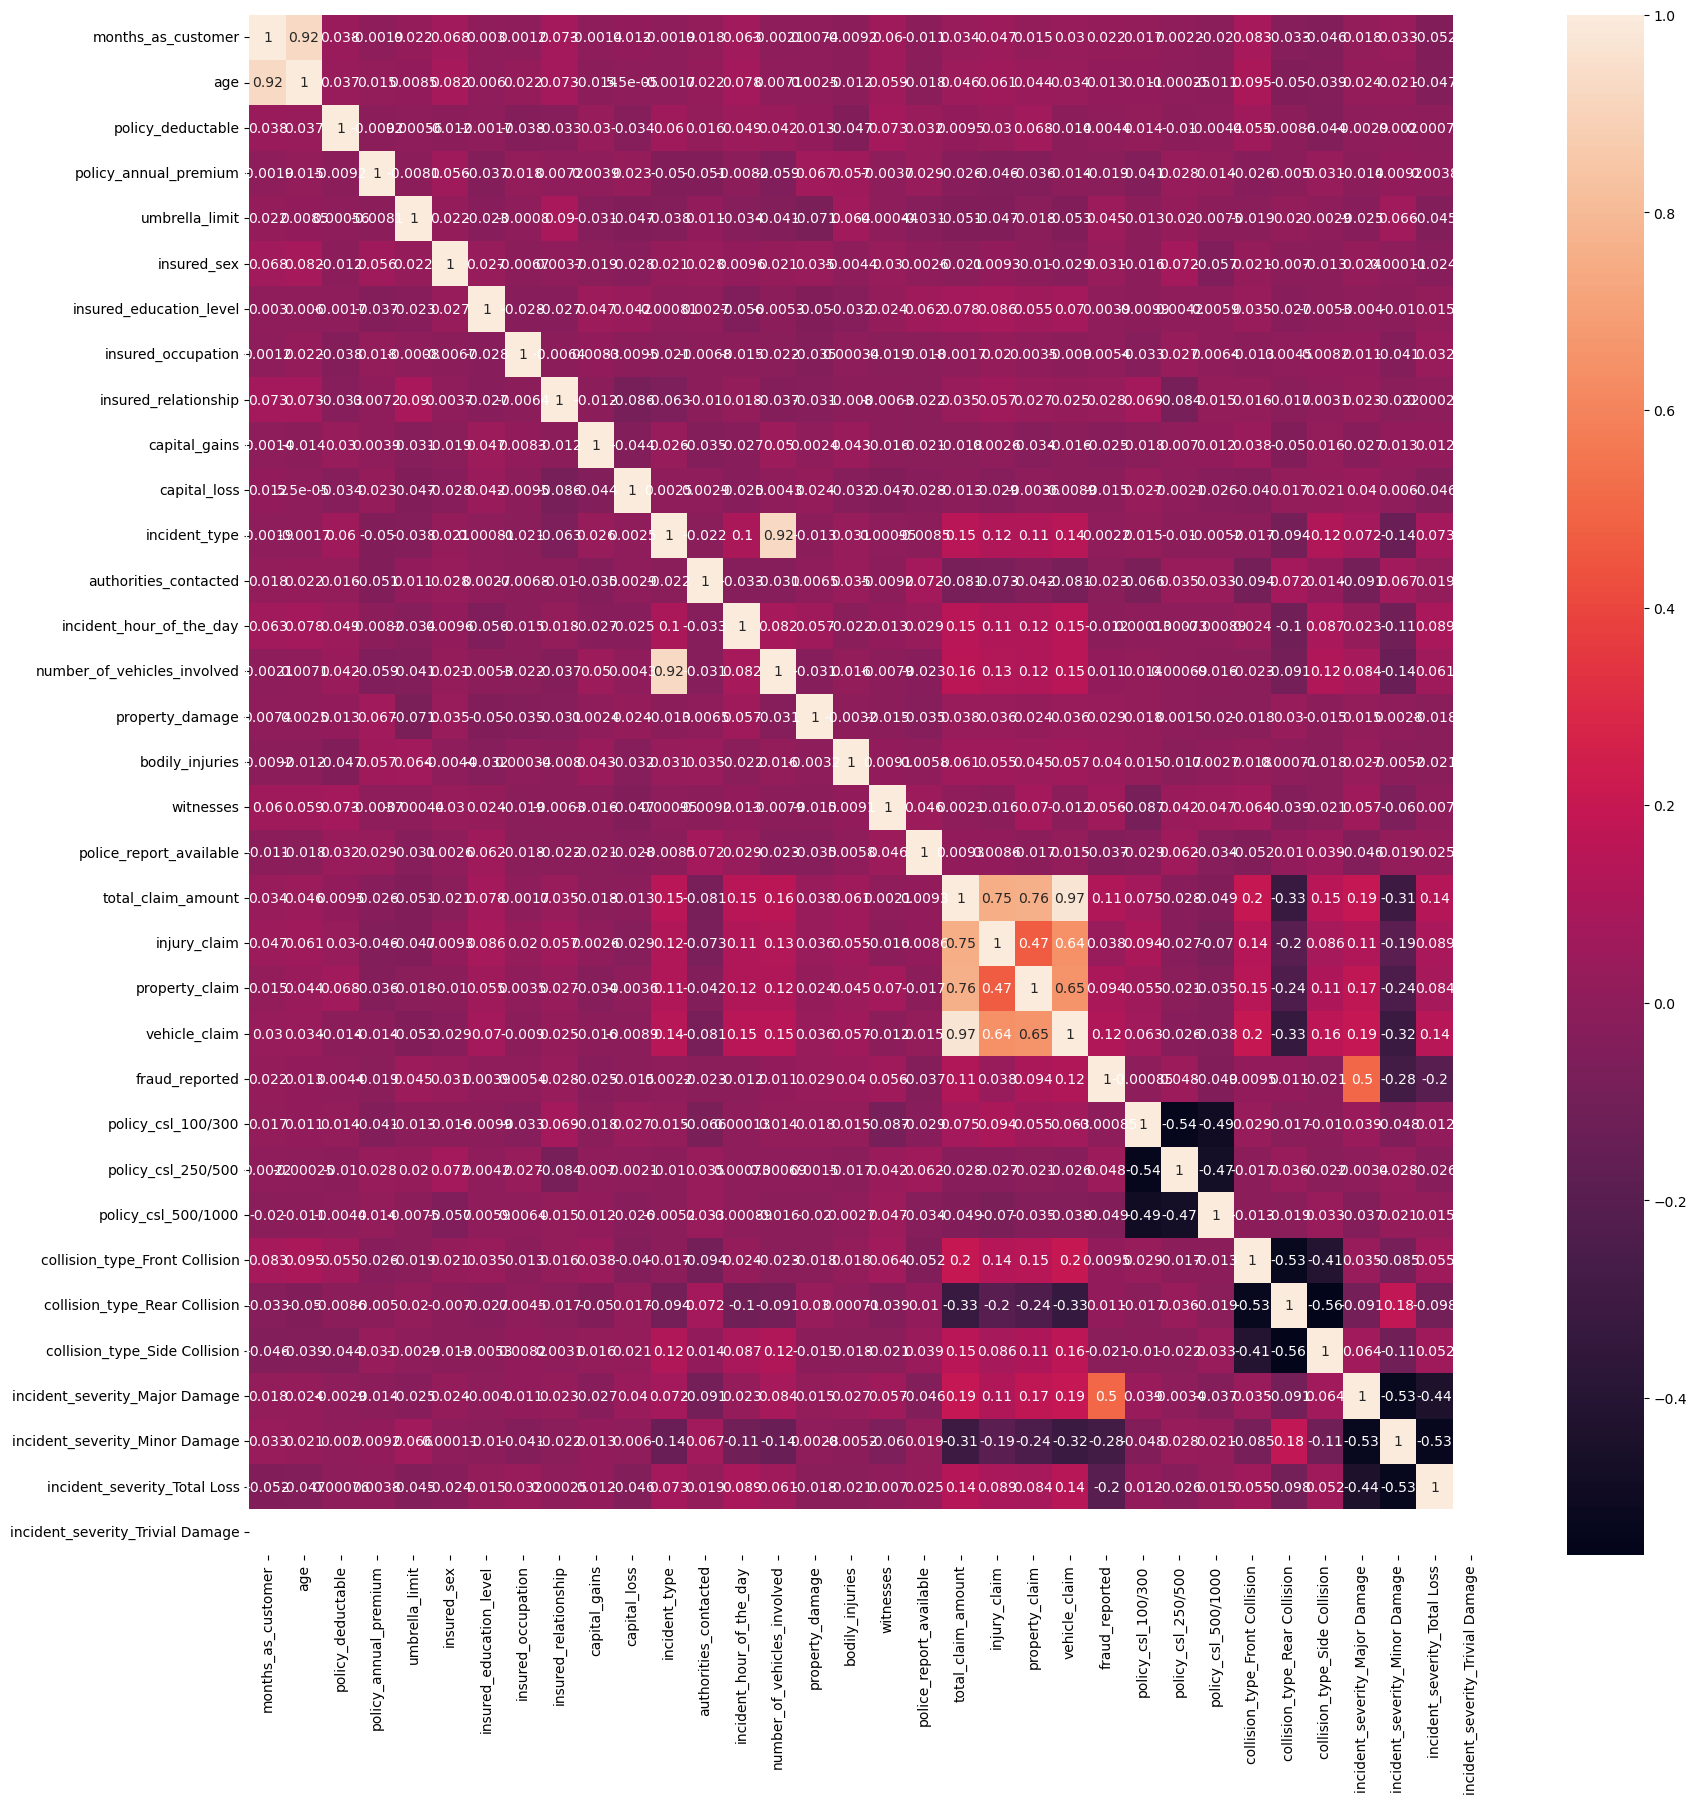

In [59]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [61]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [62]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

months_as_customer       age  policy_deductable  policy_annual_premium  \
0              1.044737  0.954356          -0.233232               0.612349   
1              0.184514  0.308954           1.398480              -0.261123   
2             -0.624096 -1.089418           1.398480               0.638300   
3              0.425376  0.201387           1.398480               0.649131   
4              0.184514  0.524088          -0.233232               1.349649   
..                  ...       ...                ...                    ...   
887           -1.750988 -0.121314          -0.233232               0.211999   
888            0.674841  0.201387          -0.233232               0.736815   
889           -0.658505 -0.551583          -1.049088               0.514792   
890            2.163027  2.460295           1.398480               0.404114   
891            2.145823  2.245161          -0.233232              -2.056595   

     umbrella_limit  insured_sex  insured_education_level  insured_occupation  \
0         -0.466936     1.072100                 0.523376           -1.161135   
1          1.907678     1.072100                 0.523376           -0.165478   
2          1.907678    -0.932749                 1.548298            1.079094   
3          2.382600    -0.932749                 1.548298           -1.410049   
4          2.382600     1.072100                -1.526466            1.079094   
..              ...          ...                      ...                 ...   
887       -0.466936    -0.932749                 1.035837           -1.161135   
888       -0.466936    -0.932749                 1.548298            0.581265   
889        0.957832    -0.932749                 1.035837           -1.410049   
890        1.907678     1.072100                -1.526466           -0.414392   
891       -0.466936    -0.932749                -1.526466            1.079094   

     insured_relationship  capital_gains  ...  policy_csl_100/300  \
0               -1.429525       0.986852  ...           -0.742499   
1               -0.236136      -0.918104  ...           -0.742499   
2                0.360559       0.336379  ...            1.346804   
3                0.957254       0.829595  ...           -0.742499   
4                0.957254       1.440754  ...           -0.742499   
..                    ...            ...  ...                 ...   
887              0.957254      -0.918104  ...           -0.742499   
888              1.553948       1.615881  ...            1.346804   
889             -0.236136       0.336379  ...           -0.742499   
890              1.553948      -0.918104  ...           -0.742499   
891             -1.429525      -0.918104  ...           -0.742499   

     policy_csl_250/500  policy_csl_500/1000  collision_type_Front Collision  \
0              1.387296            -0.658850                       -0.622292   
1              1.387296            -0.658850                       -0.622292   
2             -0.720827            -0.658850                       -0.622292   
3              1.387296            -0.658850                        1.606963   
4             -0.720827             1.517796                       -0.622292   
..                  ...                  ...                             ...   
887           -0.720827             1.517796                        1.606963   
888           -0.720827            -0.658850                       -0.622292   
889            1.387296            -0.658850                       -0.622292   
890           -0.720827             1.517796                       -0.622292   
891            1.387296            -0.658850                       -0.622292   

     collision_type_Rear Collision  collision_type_Side Collision  \
0                        -0.847756                       1.517796   
1                         1.179585                      -0.658850   
2                         1.179585                      -0.658850   
3                

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
sm=SMOTE()
X,Y=sm.fit_resample(x,y)

In [66]:
Y.value_counts()

1    658
0    658
Name: fraud_reported, dtype: int64

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV

# Finding Best Random State for Classification Model

In [69]:
maxAcc=0
maxRs=0
for i in range(1000):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        maxRs=i
print("Best Score ",maxAcc)
print("Best random state ",maxRs)

Best Score  0.8253164556962025
Best random state  272


In [70]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=maxRs)

In [72]:
print('Shape of x_train :',x_train.shape)
print('Shape of x_tets :',x_test.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_test :',y_test.shape)

Shape of x_train : (921, 33)
Shape of x_tets : (395, 33)
Shape of y_train : (921,)
Shape of y_test : (395,)


In [80]:
def classify(clf,x,y):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=272)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print('Accuracy Score :',acc_score)
    con_matrix=confusion_matrix(y_test,pred)
    print('Confusion Matrix :',con_matrix)
    class_report=classification_report(y_test,pred)
    print('Classification Report :',class_report)
    cv_score=(cross_val_score(clf,X,Y,cv=5).mean())
    print('Cross Validation Score :',cv_score)
    result=acc_score-cv_score
    print('Result :',result)

# Logistic Regression

In [81]:
clf=LogisticRegression()
classify(clf,x,y)

Accuracy Score : 0.8253164556962025
Confusion Matrix : [[176  23]
 [ 46 150]]
Classification Report :               precision    recall  f1-score   support

           0       0.79      0.88      0.84       199
           1       0.87      0.77      0.81       196

    accuracy                           0.83       395
   macro avg       0.83      0.82      0.82       395
weighted avg       0.83      0.83      0.82       395

Cross Validation Score : 0.7773649037907593
Result : 0.0479515519054432


# Decision Tree Classifier

In [82]:
clf=DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score : 0.779746835443038
Confusion Matrix : [[158  41]
 [ 46 150]]
Classification Report :               precision    recall  f1-score   support

           0       0.77      0.79      0.78       199
           1       0.79      0.77      0.78       196

    accuracy                           0.78       395
   macro avg       0.78      0.78      0.78       395
weighted avg       0.78      0.78      0.78       395

Cross Validation Score : 0.7797413296462725
Result : 5.505796765503668e-06


# Gradient Boosting Classifier

In [83]:
clf=GradientBoostingClassifier()
classify(clf,x,y)

Accuracy Score : 0.8582278481012658
Confusion Matrix : [[180  19]
 [ 37 159]]
Classification Report :               precision    recall  f1-score   support

           0       0.83      0.90      0.87       199
           1       0.89      0.81      0.85       196

    accuracy                           0.86       395
   macro avg       0.86      0.86      0.86       395
weighted avg       0.86      0.86      0.86       395

Cross Validation Score : 0.8405346238045859
Result : 0.017693224296679966


# SVC

In [84]:
clf=SVC()
classify(clf,x,y)

Accuracy Score : 0.8734177215189873
Confusion Matrix : [[174  25]
 [ 25 171]]
Classification Report :               precision    recall  f1-score   support

           0       0.87      0.87      0.87       199
           1       0.87      0.87      0.87       196

    accuracy                           0.87       395
   macro avg       0.87      0.87      0.87       395
weighted avg       0.87      0.87      0.87       395

Cross Validation Score : 0.8586847563083305
Result : 0.014732965210656812


# Ada Boost Classifier

In [85]:
clf=AdaBoostClassifier()
classify(clf,x,y)

Accuracy Score : 0.8278481012658228
Confusion Matrix : [[172  27]
 [ 41 155]]
Classification Report :               precision    recall  f1-score   support

           0       0.81      0.86      0.83       199
           1       0.85      0.79      0.82       196

    accuracy                           0.83       395
   macro avg       0.83      0.83      0.83       395
weighted avg       0.83      0.83      0.83       395

Cross Validation Score : 0.804075930406729
Result : 0.023772170859093777


# Random Forest Classifier

In [86]:
clf=RandomForestClassifier()
classify(clf,x,y)

Accuracy Score : 0.8810126582278481
Confusion Matrix : [[179  20]
 [ 27 169]]
Classification Report :               precision    recall  f1-score   support

           0       0.87      0.90      0.88       199
           1       0.89      0.86      0.88       196

    accuracy                           0.88       395
   macro avg       0.88      0.88      0.88       395
weighted avg       0.88      0.88      0.88       395

Cross Validation Score : 0.8564523562622421
Result : 0.02456030196560599


# XG Boost Classifier

In [87]:
import xgboost as xgb

In [88]:
clf=xgb.XGBClassifier()
classify(clf,x,y)

Accuracy Score : 0.8784810126582279
Confusion Matrix : [[179  20]
 [ 28 168]]
Classification Report :               precision    recall  f1-score   support

           0       0.86      0.90      0.88       199
           1       0.89      0.86      0.88       196

    accuracy                           0.88       395
   macro avg       0.88      0.88      0.88       395
weighted avg       0.88      0.88      0.88       395

Cross Validation Score : 0.8534508583938241
Result : 0.025030154264403803


From the evolution metrics, I choose Random Forest Classifier as an best model because it has best f1 score and less difference between cv score and acc score.

In [89]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc_score=accuracy_score(y_test,pred)
print('Accuracy Score :',acc_score)
con_matrix=confusion_matrix(y_test,pred)
print('Confusion Matrix :',con_matrix)
class_report=classification_report(y_test,pred)
print('Classification Report :',class_report)

Accuracy Score : 0.8734177215189873
Confusion Matrix : [[179  20]
 [ 30 166]]
Classification Report :               precision    recall  f1-score   support

           0       0.86      0.90      0.88       199
           1       0.89      0.85      0.87       196

    accuracy                           0.87       395
   macro avg       0.87      0.87      0.87       395
weighted avg       0.87      0.87      0.87       395



# Hyper parameter Tuning

In [90]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [200,500],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6],
    'criterion':['gini','entropy']
}
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=2)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'], 'max_depth': [3, 6],
                         'max_features': [0.5, 0.7],
                         'n_estimators': [200, 500]})

In [91]:
print('Best Score:',grid_search.best_score_*100)
print('Best estimator:',grid_search.best_estimator_)
print('Best parameters:', grid_search.best_params_)

Best Score: 81.87211166650947
Best estimator: RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=6,
                       max_features=0.5, n_estimators=500)
Best parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.5, 'n_estimators': 500}


In [92]:
rf_final=RandomForestClassifier(criterion='entropy',bootstrap=False,max_depth=6,max_features=0.5,n_estimators=500)
rf_final.fit(x_train,y_train)
pred_f=rf_final.predict(x_test)
acc_score=accuracy_score(y_test,pred_f)
print('Accuracy Score :',acc_score)
con_matrix=confusion_matrix(y_test,pred_f)
print('Confusion Matrix :',con_matrix)
class_report=classification_report(y_test,pred_f)
print('Classification Report :',class_report)

Accuracy Score : 0.8658227848101265
Confusion Matrix : [[178  21]
 [ 32 164]]
Classification Report :               precision    recall  f1-score   support

           0       0.85      0.89      0.87       199
           1       0.89      0.84      0.86       196

    accuracy                           0.87       395
   macro avg       0.87      0.87      0.87       395
weighted avg       0.87      0.87      0.87       395



# AOC RUC Curve

In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

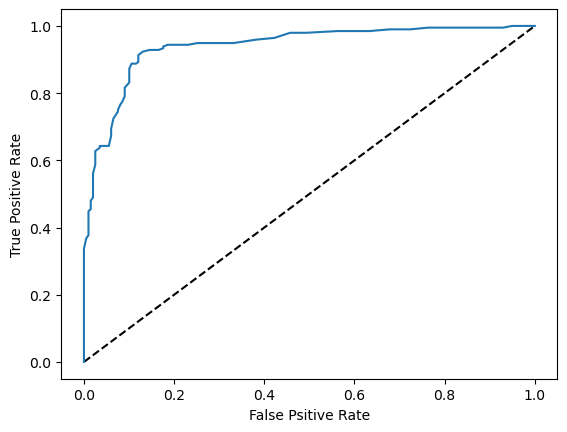

Score: 87.32181314736951


In [94]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False Psitive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print('Score:',auc_score*100)

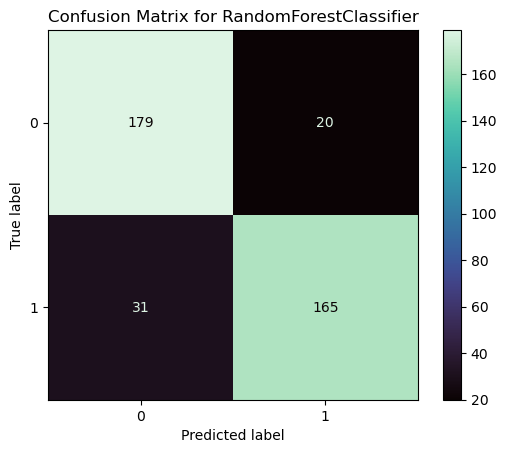

In [95]:
class_names=df.columns
metrics.plot_confusion_matrix(rf.fit(x_train,y_train),x_test,y_test,cmap='mako')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Saving The Model

In [96]:
import pickle

In [97]:
filename='Insurance Claim Fraud Detection.pkl'
pickle.dump(rf,open(filename,'wb'))
loaded_model=pickle.load(open('Insurance Claim Fraud Detection.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

87.0886075949367


In [98]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predicted','Original'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  385  386  \
Predicted    1    1    0    1    1    0    0    0    1    1  ...    1    0   
Original     1    1    0    1    0    0    0    0    1    1  ...    1    0   

           387  388  389  390  391  392  393  394  
Predicted    0    1    0    0    1    1    1    1  
Original     0    1    0    0    1    1    1    1  

[2 rows x 395 columns]